<a href="https://colab.research.google.com/github/Artem7davlet/artem_git/blob/main/MathStat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Арсен

In [ ]:
print("Арсен")

Арсен


Артем

# **Логистическая регрессия**

Логистическая регрессия используется для исследования взаимосвязи между номинативной зависимой переменной, имеющей всего 2 градации, и различными независимыми переменными (в качестве предикторов могут быть как номинативные, так и количественные переменные).
Номинативную переменную с двумя градациями можно представить как два зависимых друг от друга вероятностных исхода, равных p и (1 - p).
Тогда регрессионная модель, в которой зависимая переменная — это номинативная переменная с двумя градациями:

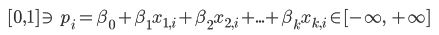

Мы хотим зависимую переменную выразить через линейную комбинацию предикторов, где коэффицент перед предиктором будет говорить о степени влияния этой независимой переменной на зависимую переменную

Первая проблема, с которой мы столкнёмся, это то, что левая часть уравнения это номинативная зависимая переменная с двумя градациями, а правая часть, это линейная комбинация наших предикторов, которая может выдавать нам в сумме число в промежутке (-∞, +∞)

Так как независимая переменная имеет две градации, можно перейти к непрерывному показателю, вероятности наступления положительного исхода, который варьируется от 0 до 1.  


Уравнение логистической регрессии:

\begin{equation}
\log(\text{odds}) = B_0 + B_1 x_1 + B_2 x_2 + \ldots + B_k x_k
\end{equation}, где log - натуральный логарифм, odds - шансы положительного исхода


\begin{equation}
p = \frac{1 + e^{\log(\text{odds})}}{e^{\log(\text{odds})}}
\end{equation}, где p - вероятность положительного исхода

Почему же тут используется натуральный логарифм шансов?

Проследим за различным соотношением положительных и отрицательных исходов и рассчитанными на их основе вероятностью, шансами и натуральным логарифмом шансов (далее просто "логарифм шансов").

Вероятность - число от нуля до единицы

Шансы - число от нуля до плюс бесконечности

Логарифм шансов - число от минус бесконечности до плюс бесконечности

Именно поэтому, нам лучше всего использовать его, зная логарифм шансов, мы можем рассчитать вероятность

# **Шансы и вероятность**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Разберем на примере подбрасывания монетки. Пусть у нас было 10 бросков и мы получили следующие результаты:

1 - орел (в примере мы хотим, чтобы выпадали орлы, это будет положительный исход)

0 - решка (отрицательный исход)

In [8]:
df = pd.DataFrame({'coin_state': [0, 0, 1, 0, 0, 0, 1, 0, 0, 0]})
df

,coin_state
0,0
1,0
2,1
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [6]:
# 2 орла, 8 решек
df.coin_state.value_counts()

coin_state
0    8
1    2
Name: count, dtype: int64

Рассчитаем вероятность:
\begin{equation}
p = \frac{\text{pos}}{\text{pos} + \text{neg}}
\end{equation}

In [9]:
pos = df.coin_state.value_counts()[1]   # количество положительных исходов
neg = df.coin_state.value_counts()[0]   # количество отрицательных исходов

p = pos / (pos + neg)
p

0.2

Рассчитаем шансы:\begin{equation}
\text{odds} = \frac{\text{pos}}{\text{neg}}
\end{equation}

In [10]:
odds = pos / neg
odds

0.25

Шансы можно посчитать, зная вероятность:\begin{equation}
\text{odds} = \frac{p}{1-p}
\end{equation}

In [11]:
p / (1 - p)

0.25

Вероятность можно посчитать, зная шансы:\begin{equation}
p = \frac{\text{odds}}{1 + \text{odds}}
\end{equation}

In [12]:
odds / (1 + odds)

0.2

Визуализируем зависимость вероятности от логарифма шансов:


In [13]:
pd.DataFrame({
    'pos': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'neg': [10, 0, 8, 7, 6, 5, 4, 3, 2, 1, 0],
    'p': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'odds': [0, 0.11, 0.25, 0.43, 0.66, 1, 1.5, 2.33, 4, 9, np.nan],
    'log(odds)': [np.nan, -2.2, -1.39, -0.85, -0.41, 0, 0.41, 0.85, 1.39, 2.2, np.nan],
})

,pos,neg,p,odds,log(odds)
0,0,10,0.0,0.00,NaN
1,1,0,0.1,0.11,-2.20
2,2,8,0.2,0.25,-1.39
3,3,7,0.3,0.43,-0.85
4,4,6,0.4,0.66,-0.41
5,5,5,0.5,1.00,0.00
6,6,4,0.6,1.50,0.41
7,7,3,0.7,2.33,0.85
8,8,2,0.8,4.00,1.39
9,9,1,0.9,9.00,2.20


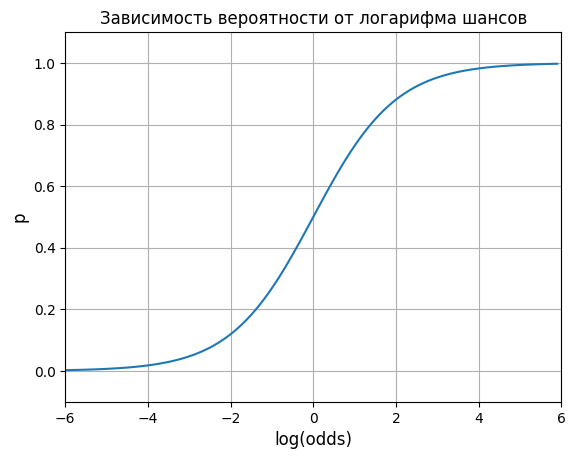

In [14]:
log_odds = np.arange(-6, 6, 0.1)
p = np.exp(log_odds) / (1 + np.exp(log_odds))

plt.plot(log_odds, p)
plt.grid()
plt.xlim(-6, 6)
plt.ylim(-0.1, 1.1)
plt.title('Зависимость вероятности от логарифма шансов', fontsize=12)
plt.xlabel('log(odds)', fontsize=12)
plt.ylabel('p', fontsize=12)

plt.show()
plt.close()

Картинка получше:


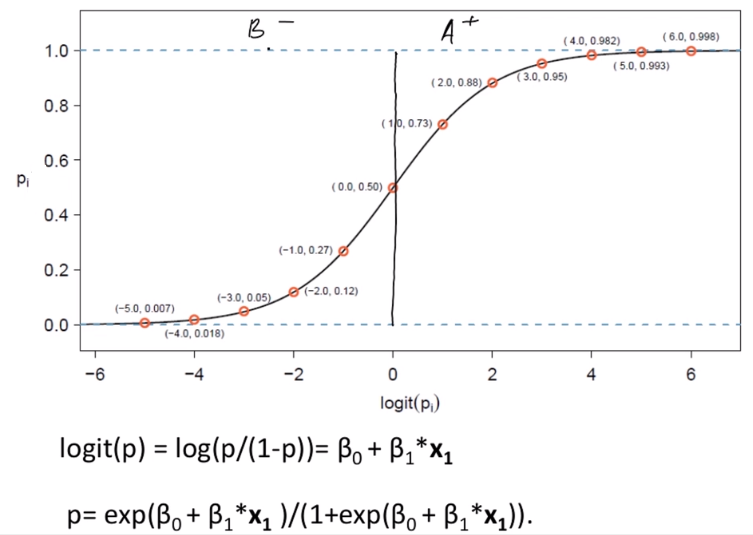

Предположим, мы подбросили монетку 100 раз, и 70 раз выпал орел. Чему равняется натуральный логарифм шансов выпадения решки?

In [15]:
import math
math.log(30/70)

-0.8472978603872037

Предположим, что мы получили логарифм шансов выпадения решки, равный -1. Тогда вероятность выпадения решки равняется...

In [16]:
math.exp(-1) / (1 + math.exp(-1))


0.2689414213699951

# Модель без предикторов (Intercept only model)

\begin{equation}
\log(\text{odds}) = B_0 + B_1 x_1 + B_2 x_2 + \ldots + B_k x_k
\end{equation}

Модель без предикторов описывается уравнением: y = intercept (одному числу, без предикторов)

Intercept - натуральный логарифм шансов положительного исхода. И свободный член логистической регресии.

Т.е. мы хотим предсказать логарифм шансов, используя только одно число: log( p/(1-p) ) = intercept


H0: Нет никакой разницы между исходом №1 и исходом №2 и нормальное распределение описывает распределение коэффициентов логистической регрессии:

p = 1 - p;
odds = 1;
Логарифм шансов logit(p) = 0 , т.е. logit(p) (он же intercept) имеет нормальное распределение со средним равным 0

In [ ]:
print("Артем")

Артем


Ильнар

#Кластерный анализ и метод главных компонент

Мы разберем два метода:
Метод K средних и метод главных компонент

##Зачем они нужны?

При помощи кластерного анализа мы научимся существует ли в наших данных подгруппы испытуемых и сколько таких групп. Этот метод также является одним из подходов "обучением без учителя".

In [ ]:
print("Ильнар")

Ильнар
